# Example Notebook

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
import os

import numpy as np
import pandas as pd
import json
import os
import yaml
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset
from survos2.frontend.nb_utils import start_server, stop_server

# Start Server

In [4]:
port = 7779

In [5]:

server_process = start_server(port)

In [6]:
#server_process

# Set workspace

In [7]:
workspace_name = 'epfl512'
workspace_name = 'huntcrop2' # set workspace here
workspace_name = 'testroi2'
DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

In [8]:
server_uri = '127.0.0.1:' + str(port)

In [9]:
Launcher.g.set_remote(server_uri)
DataModel.g.server_uri = server_uri

INFO - Launcher setting remote to 127.0.0.1:7779  - survos2.frontend.control.launcher:set_remote:85


In [10]:
#DataModel.g.server_uri

In [10]:
DataModel.g.CHROOT 

'C:\\dls\\science\\groups\\das\\SuRVoS\\s2\\data'

In [9]:
#stop_server(server_process)

In [70]:
workspace_name = test_workspace_name

In [71]:
DataModel.g.current_workspace = workspace_name

# Inspect workspace

In [11]:
survos.run_command('workspace', 'list_datasets',  workspace=workspace_name)

(['testroi2_dataset'], False)

In [12]:
Launcher.g.run('workspace', 'metadata',  workspace=workspace_name, dataset="data", json_transport=True)

HTTPError: 500 Internal Server Error occured for url: workspace/metadata

In [11]:
Launcher.g.run('features', 'existing', workspace=workspace_name)

{'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'},
 '002_tvdenoise': {'kind': 'tvdenoise',
  'max_iter': 100,
  'name': 'tvdenoise',
  'pad': 8,
  'regularization_amount': 0.001,
  'source': '001_raw',
  'id': '002_tvdenoise'},
 '003_gaussian_blur': {'kind': 'gaussian_blur',
  'name': 'gaussian_blur',
  'sigma': [6, 6, 6],
  'source': '001_raw',
  'id': '003_gaussian_blur'}}

In [14]:
Launcher.g.run('annotations', 'get_levels', workspace=workspace_name)

[{'kind': 'level', 'modified': [0], 'name': '001 Level', 'id': '001_level'}]

In [15]:
Launcher.g.run('superregions', 'existing', uri=server_uri, workspace=workspace_name)

{'001_supervoxels': {'kind': 'supervoxels',
  'name': '001 Supervoxels',
  'id': '001_supervoxels'}}

In [46]:
Launcher.g.run('pipelines', 'existing', uri=server_uri, workspace=workspace_name)

{}

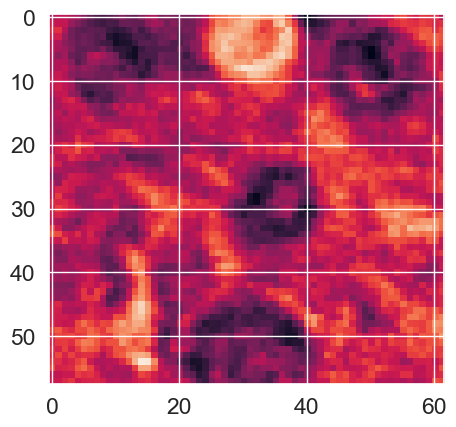

In [54]:
feature_array = view_dataset('001_raw', 'features', 50)

In [55]:
feature_array.shape

(186, 58, 62)

In [15]:
# needed for relative path to work
import os
os.chdir("..\..")
os.getcwd()

workflow_name = 'tests\\workflows\\feature_set.yaml'
#workflow_name = 'tests/workflows/superegion.yaml'     
all_params, params  = run_workflow(workflow_name)

INFO - Executing workflow {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/002_tvdenoise', 'modal': True, 'regularization_amount': 0.0005, 'pad': 8, 'max_iter': 100}  - survos2.server.pipeline:run_workflow:104


{2: {'action': 'features.tvdenoise', 'src': '001_raw', 'dst': '002_tvdenoise', 'params': {'regularization_amount': 0.0005, 'pad': 8, 'max_iter': 100}}, 3: {'action': 'features.gaussian_blur', 'src': '001_raw', 'dst': '003_gaussian_blur', 'params': {'sigma': [6, 6, 6]}}, 4: {'action': 'features.laplacian', 'src': '001_raw', 'dst': '004_laplacian', 'params': {'sigma': [3, 3, 3]}}, 5: {'action': 'features.spatial_gradient_3d', 'src': '001_raw', 'dst': '005_spatial_gradient_3d', 'params': {'dim': 0}}, 6: {'action': 'features.hessian_eigenvalues', 'src': '001_raw', 'dst': '006_hessian', 'params': {'sigma': [3, 3, 3]}}, 7: {'action': 'features.gamma_correct', 'src': '003_gaussian_blur', 'dst': '007_gamma_correct', 'params': {'gamma': 2.0}}, 8: {'action': 'features.threshold', 'src': '007_gamma_correct', 'dst': '008_threshold', 'params': {'num_iter': 1}}, 9: {'action': 'features.dilation', 'src': '008_threshold', 'dst': '009_dilation', 'params': {'num_iter': 1}}}
+ Running 2, with features, t

INFO - Executing workflow {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/003_gaussian_blur', 'modal': True, 'sigma': [6, 6, 6]}  - survos2.server.pipeline:run_workflow:104


+ Running 3, with features, gaussian_blur on survos://default@testroi2:features/001_raw
 to dst survos://default@testroi2:features/003_gaussian_blur {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/003_gaussian_blur', 'modal': True, 'sigma': [6, 6, 6]}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/004_laplacian', 'modal': True, 'sigma': [3, 3, 3]}  - survos2.server.pipeline:run_workflow:104


+ Running 4, with features, laplacian on survos://default@testroi2:features/001_raw
 to dst survos://default@testroi2:features/004_laplacian {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/004_laplacian', 'modal': True, 'sigma': [3, 3, 3]}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/005_spatial_gradient_3d', 'modal': True, 'dim': 0}  - survos2.server.pipeline:run_workflow:104


+ Running 5, with features, spatial_gradient_3d on survos://default@testroi2:features/001_raw
 to dst survos://default@testroi2:features/005_spatial_gradient_3d {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/005_spatial_gradient_3d', 'modal': True, 'dim': 0}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/006_hessian', 'modal': True, 'sigma': [3, 3, 3]}  - survos2.server.pipeline:run_workflow:104


+ Running 6, with features, hessian_eigenvalues on survos://default@testroi2:features/001_raw
 to dst survos://default@testroi2:features/006_hessian {'src': 'survos://default@testroi2:features/001_raw', 'dst': 'survos://default@testroi2:features/006_hessian', 'modal': True, 'sigma': [3, 3, 3]}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/003_gaussian_blur', 'dst': 'survos://default@testroi2:features/007_gamma_correct', 'modal': True, 'gamma': 2.0}  - survos2.server.pipeline:run_workflow:104


+ Running 7, with features, gamma_correct on survos://default@testroi2:features/003_gaussian_blur
 to dst survos://default@testroi2:features/007_gamma_correct {'src': 'survos://default@testroi2:features/003_gaussian_blur', 'dst': 'survos://default@testroi2:features/007_gamma_correct', 'modal': True, 'gamma': 2.0}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/007_gamma_correct', 'dst': 'survos://default@testroi2:features/008_threshold', 'modal': True, 'num_iter': 1}  - survos2.server.pipeline:run_workflow:104


+ Running 8, with features, threshold on survos://default@testroi2:features/007_gamma_correct
 to dst survos://default@testroi2:features/008_threshold {'src': 'survos://default@testroi2:features/007_gamma_correct', 'dst': 'survos://default@testroi2:features/008_threshold', 'modal': True, 'num_iter': 1}



INFO - Executing workflow {'src': 'survos://default@testroi2:features/008_threshold', 'dst': 'survos://default@testroi2:features/009_dilation', 'modal': True, 'num_iter': 1}  - survos2.server.pipeline:run_workflow:104


+ Running 9, with features, dilation on survos://default@testroi2:features/008_threshold
 to dst survos://default@testroi2:features/009_dilation {'src': 'survos://default@testroi2:features/008_threshold', 'dst': 'survos://default@testroi2:features/009_dilation', 'modal': True, 'num_iter': 1}



# Superregion segment

In [15]:
src = DataModel.g.dataset_uri('003_superegion_segment', group="pipelines")
src

'survos://default@huntcrop2:pipelines/003_superegion_segment'

In [16]:
dst = src

In [45]:
params= {'src': src,
 'dst': dst,
 'anno_id': '005_level',
 'classifier_params': {'clf': 'ensemble',
                       'learning_rate': 1.0,
                       'max_depth': 15,
                       'n_estimators': 100,
                       'n_jobs': 10,
                       'subsample': 1.0,
                       'type': 'rf'},
 'classifier_type': 'Ensemble',
 'confidence': False,
 'constrain_mask': 'None',
 'feature_ids': ['001_raw', '002_gaussian_norm', '003_wavelet'],
 'lam': 0.0,
 'projection_type': 'None',
 'refine': True,
 'region_id': '001_supervoxels',
 'workspace': 'huntcrop2'}

In [46]:
Launcher.g.run('pipelines', 'superregion_segment', json_transport=True, **params)

{'anno_id': '005_level',
 'feature_id': [['001_raw', '001 Raw']],
 'kind': 'train_multi_axis_cnn',
 'multi_ax_train_params': {'bce_dice_alpha': '0.75',
  'bce_dice_beta': '0.25',
  'cyc_frozen': 1,
  'cyc_unfrozen': 0,
  'encoder_type': 'resnet34',
  'loss_criterion': 'DiceLoss',
  'model_type': 'U_Net',
  'patience': '3'},
 'name': '004 Train Multi Axis Cnn',
 'source': '004_train_multi_axis_cnn',
 'workspace': 'huntcrop2',
 'constrain_mask': 'None',
 'region_id': '001_supervoxels',
 'lam': 0.0,
 'refine': True,
 'classifier_type': 'Ensemble',
 'projection_type': 'None',
 'confidence': False,
 'classifier_params': {'clf': 'Ensemble',
  'learning_rate': 1.0,
  'max_depth': 15,
  'n_estimators': 100,
  'n_jobs': 10,
  'subsample': 1.0,
  'type': 'rf',
  'proj': 'None'},
 'feature_ids': ['001_raw', '002_gaussian_norm', '003_wavelet'],
 'id': '004_train_multi_axis_cnn'}

In [36]:
src = DataModel.g.dataset_uri('004_train_multi_axis_cnn', group="pipelines")
src

'survos://default@huntcrop2:pipelines/004_train_multi_axis_cnn'

In [37]:
dst = src

In [49]:
params = {
  'src': src,
  'dst': dst,  
  'anno_id': [['003_level', '003 Level']],
  'feature_id': [['001_raw', '001 Raw']],
  'kind': 'train_multi_axis_cnn',
  'multi_ax_train_params': {'bce_dice_alpha': '0.75',
   'bce_dice_beta': '0.25',
   'cyc_frozen': 1,
   'cyc_unfrozen': 0,
   'encoder_type': 'resnet34',
   'loss_criterion': 'DiceLoss',
   'model_type': 'U_Net',
   'patience': '3'},
  'name': '004 Train Multi Axis Cnn',
  'source': '001_raw',
  'workspace': 'hunt_crop2',
  'id': '004_train_multi_axis_cnn'}

In [50]:
Launcher.g.run('pipelines', 'train_multi_axis_cnn', json_transport=True, **params)

HTTPError: 500 Internal Server Error occured for url: pipelines/train_multi_axis_cnn

In [39]:
Launcher.g.run'annotations', 'get_volume', uri=server_uri, workspace=workspace_name, src="survos://default@:annotations/006_level")

INFO - Contacting endpoint http://127.0.0.1:8046/  - survos2.survos:remote_client:104


HTTPError: 500 Internal Server Error occured for url: annotations/get_volume

In [34]:
params = {
    "src" : "survos://default@:annotations/002_level", 
    "slice_idx" : 10,
    "order" : (1,2,3),
    "workspace": workspace_name,
}

In [82]:
r = Launcher.g.run('annotations', 'get_slice', src="survos://default@huntcrop2:annotations/002_level", slice_idx=10, order=(0,1,2)) 

In [22]:
survos.run_command('analyzer', 'label_analyzer', uri='127.0.0.1:8000', workspace=workspace_name)

INFO - Contacting endpoint http://127.0.0.1:8000/  - survos2.survos:remote_client:104


({'detail': [{'loc': ['body', 'src'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'dst'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'workspace'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'mode'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'pipelines_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'analyzers_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'annotations_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'feature_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'split_ops'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'background_label'],
    'msg': 'field required',
    'type': 'value_error.missing'}

# Perform custom processing

In [9]:
import scipy

In [10]:
processed_image = scipy.ndimage.gaussian_laplace(feature_array, sigma=3)

In [11]:
processed_image.shape

(128, 1450, 1450)

In [12]:
processed_image

array([[[ 1.09386491e-02,  9.62226000e-03,  6.89124595e-03, ...,
         -6.54761028e-03, -8.90335348e-03, -1.02451630e-02],
        [ 1.08007686e-02,  9.48126242e-03,  6.79443451e-03, ...,
         -5.17859636e-03, -7.13202171e-03, -8.26590322e-03],
        [ 1.03758536e-02,  9.06769931e-03,  6.49521127e-03, ...,
         -2.85482896e-03, -4.15769871e-03, -4.96037677e-03],
        ...,
        [ 5.09587117e-05,  9.81304911e-04,  2.12428579e-03, ...,
         -6.23097783e-03, -8.61929450e-03, -9.92689468e-03],
        [ 5.20830741e-04,  1.44247245e-03,  2.53977906e-03, ...,
         -4.87286691e-03, -7.00286776e-03, -8.18461739e-03],
        [ 7.49568688e-04,  1.63736928e-03,  2.66417325e-03, ...,
         -3.82052478e-03, -5.72856981e-03, -6.79557398e-03]],

       [[ 1.13522429e-02,  9.81980655e-03,  6.79106079e-03, ...,
         -6.72454294e-03, -8.64406675e-03, -9.72354598e-03],
        [ 1.10512469e-02,  9.54690762e-03,  6.61666412e-03, ...,
         -5.37819695e-03, -6.93625398e

In [19]:
from survos2.frontend.nb_utils import add_feature

In [20]:
add_feature(processed_image, "gaussian_laplace", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2dd946cb30>  - survos2.survos:run_command:111
DEBUG - get request to client: create  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]

Created new feature with id: 010_raw


# Modify annotations

In [13]:
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2c708993b0>  - survos2.survos:run_command:111
DEBUG - get request to client: get_levels  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': [{'kind': 'level', 'labels': {'2': {'color': '#f57900', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [1], 'name': '001 Level', 'id': '001_level'}, {'kind': 'level', 'labels': {'2': {'color': '#75507b', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'name': '002 Level', 'id': '002_level'}, 

([{'kind': 'level',
   'labels': {'2': {'color': '#f57900',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '001 Level',
   'id': '001_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#75507b',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    

INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_3003_main  - survos2.io:survos_from_uri:177
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2b2dd94b0070>  - survos2.improc.utils:__exit__:568


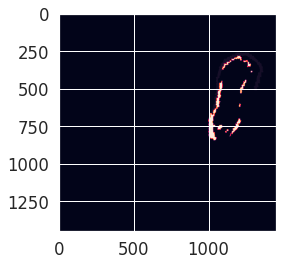

In [24]:
anno_001_level = view_dataset('001_level', 'annotations',66)
anno_001_level = anno_001_level & 15 # anno images have to be processed with this command (because of the way history works)

In [25]:
np.unique(anno_001_level)

array([0, 1], dtype=uint32)

In [27]:
anno_001_level_mod = anno_001_level + 2 #shift all the labels by 1

In [28]:
np.unique(anno_001_level_mod)

array([2, 3], dtype=uint32)

In [26]:
from survos2.frontend.nb_utils import add_anno

In [29]:
add_anno(anno_001_level_mod, "Modified Level", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2d53a71270>  - survos2.survos:run_command:111
DEBUG - get request to client: add_level  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
INFO - Creating dataset on /dls/science/groups/das/SuRVoS/s2/data/avery/vf_3003_main/default/annotations/005_level [128, 1450, 1450] uint32 None 10  - survos2.model.dataset:create:246
DEBUG - <survos2.model.dataset.Dataset object

Created new annotation with id: 005_level


# Dash VolumeSlicer

To run the Dash VolumeSlicer in the notebook jupyter-dash and dash slicer need to be installed:

pip install jupyter-dash

pip install -U dash-slicer

See https://github.com/plotly/jupyter-dash and https://dash.plotly.com/slicer

### Set the volume to view

In [47]:
vol = output_array

Run the following cells:

In [21]:
from jupyter_dash import JupyterDash
from dash import Dash, html
import imageio
from dash_slicer import VolumeSlicer
app = JupyterDash(__name__, update_title=None)

In [22]:
#vol = np.random.random((100,1000,1000))
slicer = VolumeSlicer(app, vol)
slicer.graph.config["scrollZoom"] = False
app.layout = html.Div([slicer.graph, slicer.slider, *slicer.stores])


In [24]:
app.run_server(mode="inline", port=8062)

# Initialize a workspace

In [33]:
from survos2.frontend.main import init_ws, roi_ws

In [30]:
import h5py

original_data = h5py.File("C:\\datasets\\mcd_s10_Nuc_Cyt_r1.h5", 'r')

In [31]:
roi_data = original_data['data'][0:100,0:100,0:100]

In [35]:
test_workspace_name = 'testroi2'

In [34]:
roi_ws(roi_data, test_workspace_name)

INFO - Created workspace testroi2  - survos2.frontend.main:create_and_initialize_workspace:32
INFO - Adding data to workspace <survos2.model.workspace.Workspace object at 0x000001B7BF468C10>  - survos2.api.workspace:add_data:105
INFO - Creating dataset on C:\dls\science\groups\das\SuRVoS\s2\data\testroi2\__data__ None None dask.array<truediv, shape=(100, 100, 100), dtype=float32, chunksize=(100, 100, 100), chunktype=numpy.ndarray> 10  - survos2.model.dataset:create:241
INFO - Creating dataset on C:\dls\science\groups\das\SuRVoS\s2\data\testroi2\default\testroi2_dataset [100, 100, 100] float32 None [100, 100, 100]  - survos2.model.dataset:create:241
INFO - Creating dataset on C:\dls\science\groups\das\SuRVoS\s2\data\testroi2\default\features\001_raw [100, 100, 100] float32 None [100, 100, 100]  - survos2.model.dataset:create:241


In [36]:
DataModel.g.current_workspace = test_workspace_name

In [39]:
DataModel.g.current_workspace

'testroi2'

# Use Napari in notebook

In [50]:
import napari

In [69]:
viewer = napari.view_image(feature_array)

INFO - Frontend loading workspace: huntcrop2_roi_0_186_16_74_8_70  - survos2.frontend.frontend:frontend:42


Name: median_size Parameter type: IntOrVector
Name: dim Parameter type: type


Name: sigma Parameter type: IntOrVector
Name: level Parameter type: Int
Name: sigma Parameter type: IntOrVector
Name: sigma Parameter type: IntOrVector
Name: sigma Parameter type: IntOrVector
Name: sigma Parameter type: IntOrVector
Name: sigma Parameter type: IntOrVector
Name: workspace Parameter type: type
Name: feature_A Parameter type: type
Name: feature_B Parameter type: type
Name: op Parameter type: type


Name: median_size Parameter type: IntOrVector
Name: dim Parameter type: type


In [53]:
viewer.layers

[<Image layer '001_raw' at 0x1b7ddbd3df0>, <Image layer '001_supervoxels' at 0x1b7dd94d760>, <Labels layer '001_level' at 0x1b7dd6fc310>]